In [2]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import quad

In [3]:
def rectangular_signal(t):
    t_f = np.floor(t)
    if t_f % 2 == 0:
        return 2
    else:
        return 0

def print_1_2(t, t_kernal, kernel, signal, convolved_signal, title):
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.title(title)
    plt.plot(t_kernal, kernel, label='Ядро')
    plt.title('Ядро')
    plt.subplot(3, 1, 2)
    plt.title('Сигнал')
    plt.plot(t, signal, label='Сигнал')
    plt.subplot(3, 1, 3)
    plt.plot(t, convolved_signal, label='Результат свертки')
    plt.title('Свертка с ядром')
    plt.tight_layout()
    plt.show()

def print_1_2_2(t, t_kernal, kernel, signal, convolved_signal, title, tt):
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.title(title)
    plt.plot(t_kernal, kernel, label='Ядро')
    plt.title('Ядро')
    plt.subplot(3, 1, 2)
    plt.title('Сигнал')
    plt.plot(t, signal, label='Сигнал')
    plt.subplot(3, 1, 3)
    plt.plot(t, convolved_signal, label='Результат свертки')
    plt.plot(t, tt, label='Результат свертки')
    plt.title('Свертка с ядром')
    plt.tight_layout()
    plt.show()

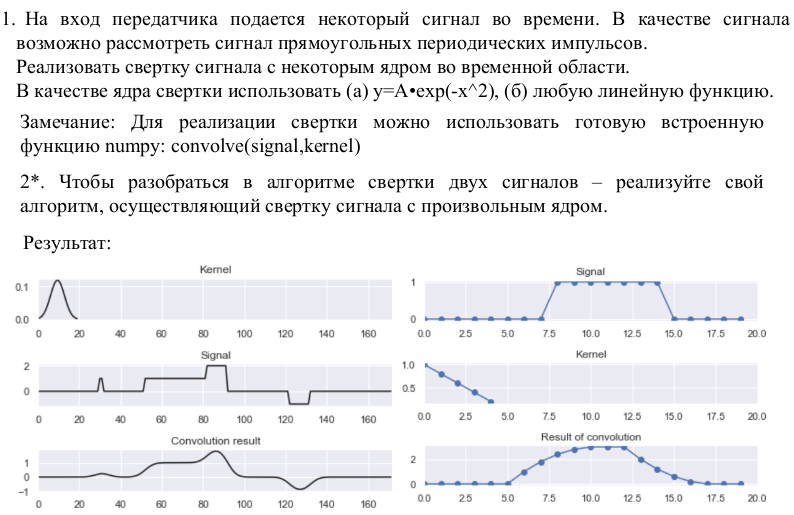

# 1

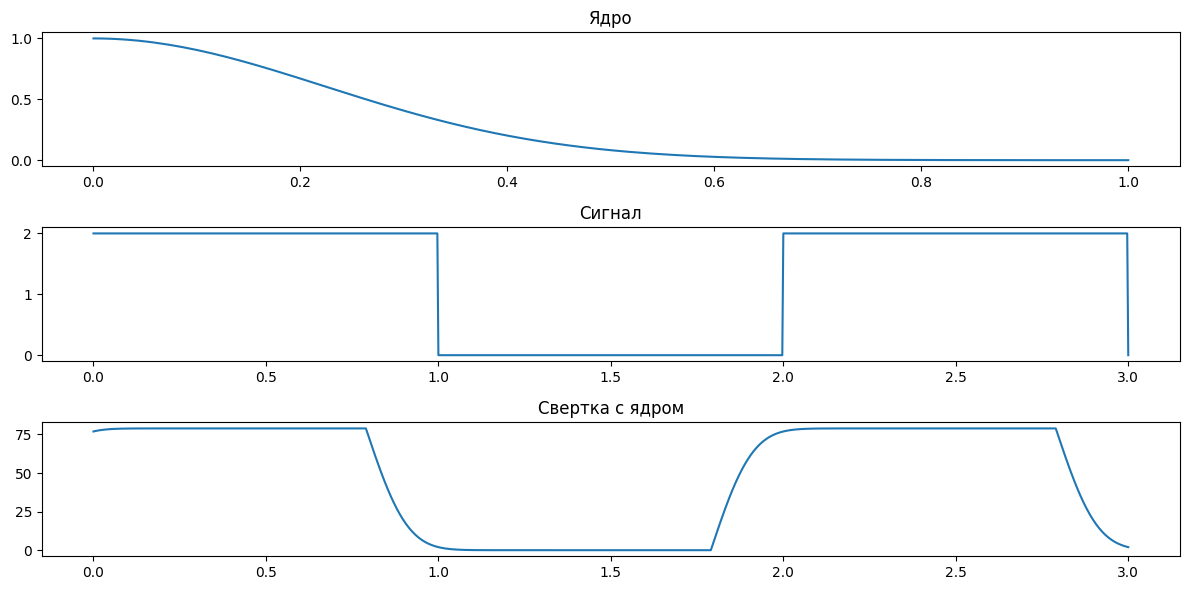

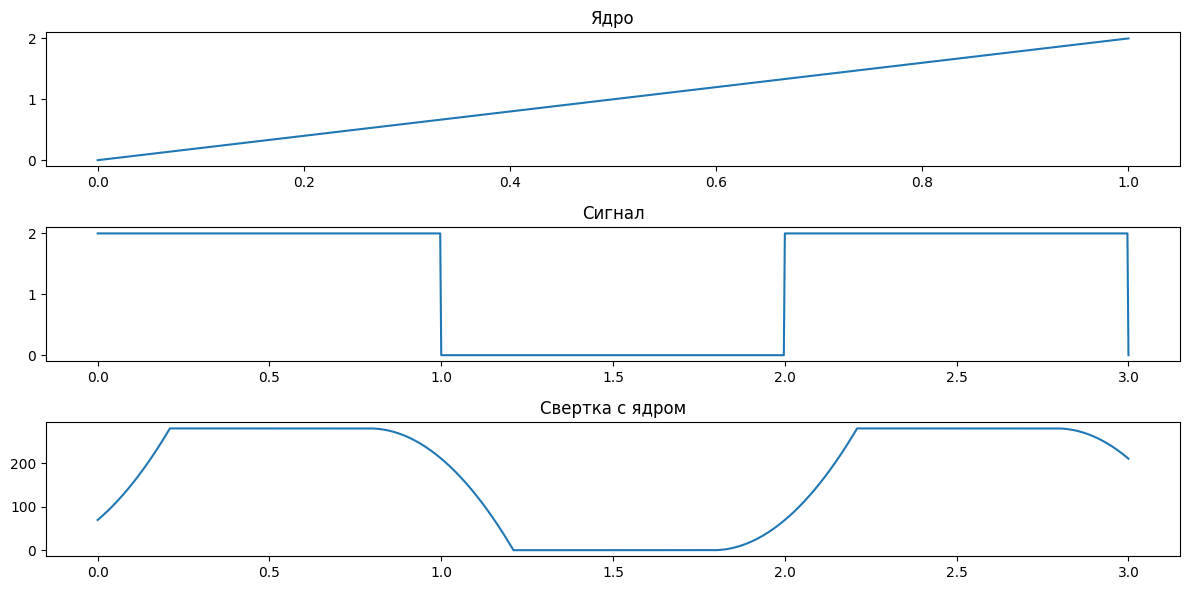

In [4]:
t = np.linspace(0, 3, 1000)
t_kernal = np.linspace(0, 1, 140)

# прямоугольные периодические импульсы
signal = np.array([rectangular_signal(x) for x in t])

# Ядро свертки Прямоугольник
A = 2
# kernel_a = A*np.exp(-np.power(t_kernal, 2)/0.1)
def kernel_exp(x, A):
    return A*np.exp(-np.power(x, 2)/0.1)
kernel_a = kernel_exp(t_kernal, 1)

# Ядро свертки - линейная функция
kernel_b = 2 * t_kernal

# Выполняем свертку
convolved_signal_a = np.convolve(signal, kernel_a, mode='same')
convolved_signal_b = np.convolve(signal, kernel_b, mode='same')

# Нарисуем графики
print_1_2(t, t_kernal, kernel_a, signal, convolved_signal_a, "Прямоугольные периодические импульсы")
print_1_2(t, t_kernal, kernel_b, signal, convolved_signal_b, "Линейный сигнал")

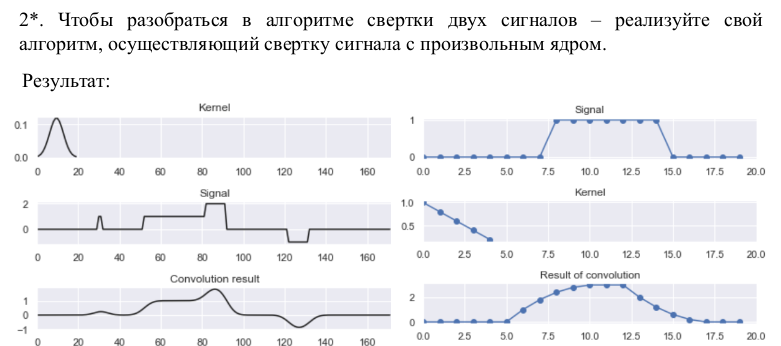

# 2

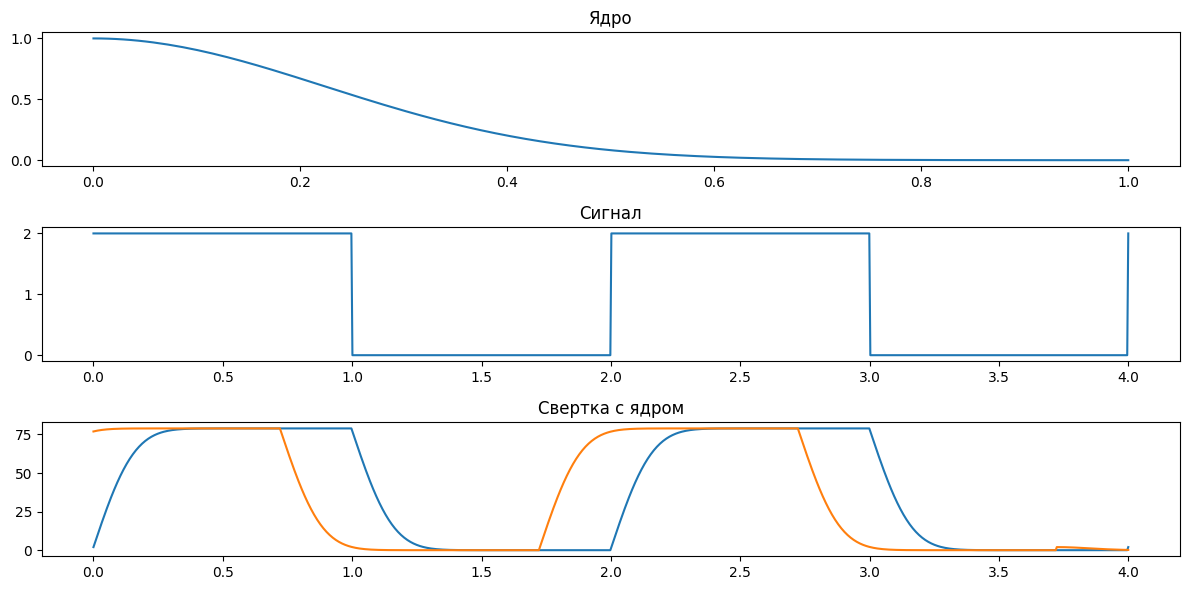

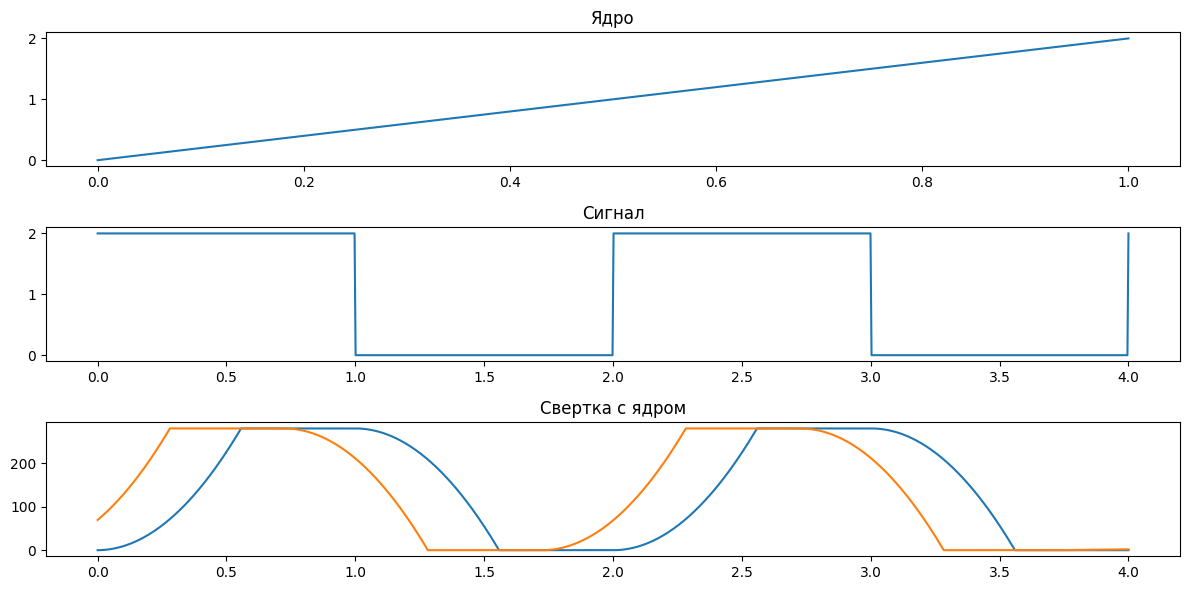

In [5]:
def my_convolve(signal, kernel):
    signal_length = len(signal)
    kernel_length = len(kernel)
    convolved_signal = np.zeros(signal_length)

    for i in range(signal_length):
        for j in range(kernel_length):
            if i - j >= 0:
                convolved_signal[i] += signal[i - j] * kernel[j]

    return convolved_signal

t = np.linspace(0, 4, 1000)
t_kernal = np.linspace(0, 1, 140)

# прямоугольные периодические импульсы
signal = np.array([rectangular_signal(x) for x in t])

# Ядро свертки Прямоугольник
A = 2
def kernel_exp(x, A):
    return A*np.exp(-np.power(x, 2)/0.1)
kernel_a = kernel_exp(t_kernal, 1)

# Ядро свертки - линейная функция
kernel_b = 2 * t_kernal
# def kernel_linear(a, x, b):
#     return a * x + b
# kernel_linear_vals = kernel_linear(1, t_kernal, 5)

# Выполняем свертку
convolved_signal_a = my_convolve(signal, kernel_a)
convolved_signal_a_2 = np.convolve(signal, kernel_a, mode='same')

convolved_signal_b = my_convolve(signal, kernel_b)
convolved_signal_b_2 = np.convolve(signal, kernel_b, mode='same')

# Нарисуем графики
print_1_2_2(t, t_kernal, kernel_a, signal, convolved_signal_a, "Прямоугольные периодические импульсы", convolved_signal_a_2)
print_1_2_2(t, t_kernal, kernel_b, signal, convolved_signal_b, "Линейный сигнал", convolved_signal_b_2)

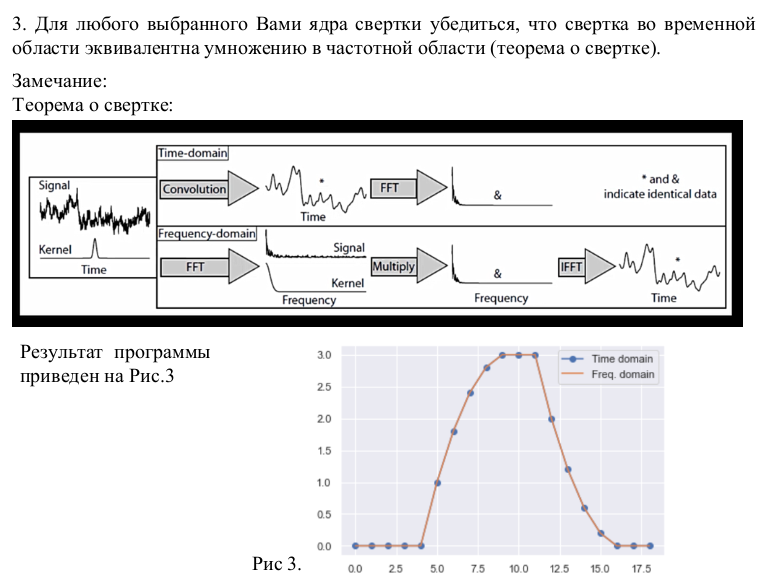

In [6]:
def fft_full(xs, ys, normalize=False):
    spectrum = np.fft.fft(ys)
    if normalize: normalize(spectrum)
    freq_series = np.fft.fftfreq(len(xs), 1/len(xs))
    return [freq_series, (spectrum)]

samples_rate = 1000

t = np.linspace(0, 4, 1000)
signal = np.array([rectangular_signal(x) for x in t])

kernel_t = np.linspace(0, 1, 200)
kernel_expo_vals = kernel_exp(kernel_t, 1)
kernel_expo_vals = np.pad(kernel_expo_vals, (400, 400))

cos_freqs, cos_spec = fft_full(t, signal) 
kernel_freqs, kernel_spec = fft_full(kernel_t, kernel_expo_vals)

conv_fft = cos_spec * kernel_spec
conv_mlt = np.fft.ifft(conv_fft)

conved_np = np.convolve(signal, kernel_expo_vals, 'same')

c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\emely\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


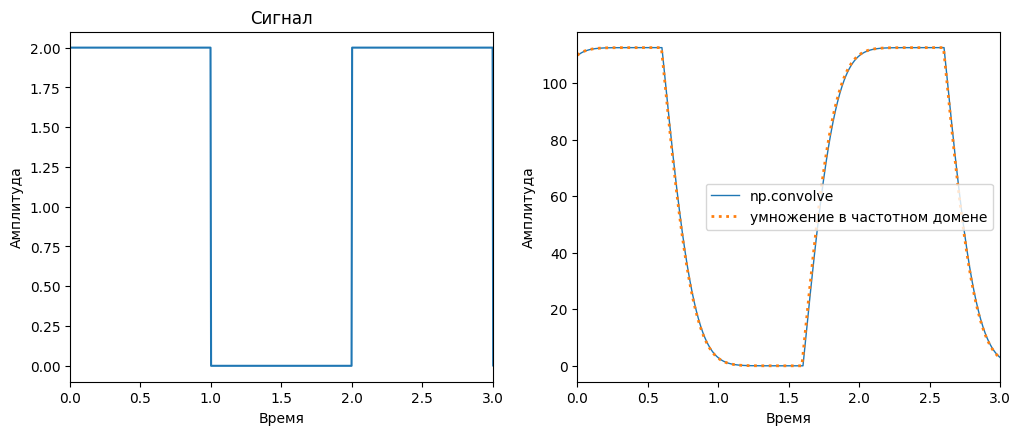

In [7]:
fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(221)
plt.title("Cигнал")
plt.plot(t, signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.xlim([0, 3])

plt.subplot(222)
plt.plot(t, conved_np, label='np.convolve', linewidth=1)
plt.plot(t, conv_mlt, label='умножение в частотном домене',  linestyle='dotted', linewidth=2)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.xlabel('Время')
plt.legend()
plt.xlim([0, 3])

plt.show()

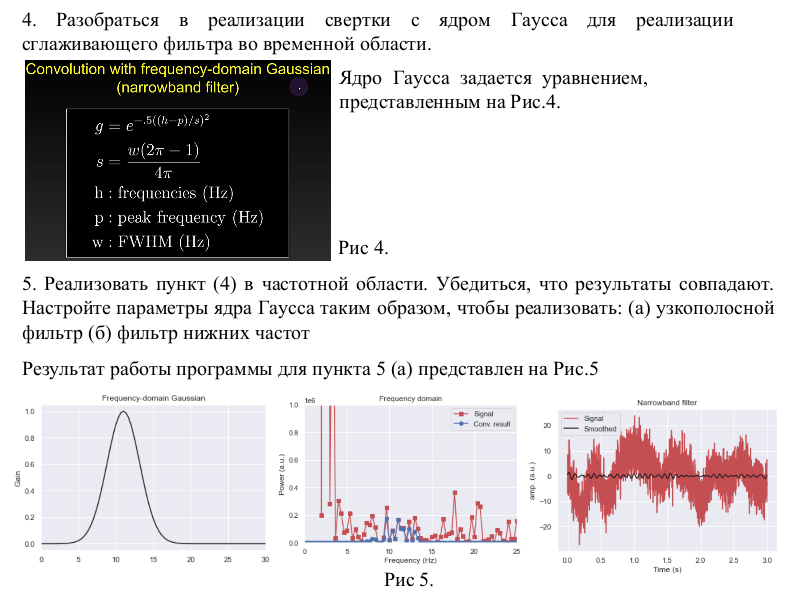

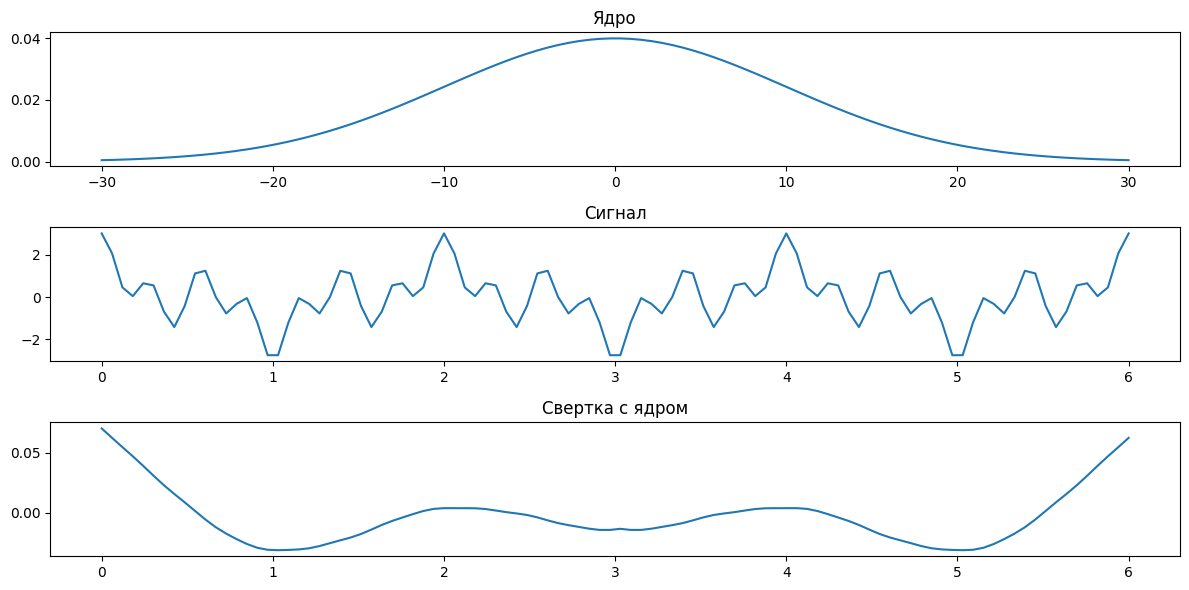

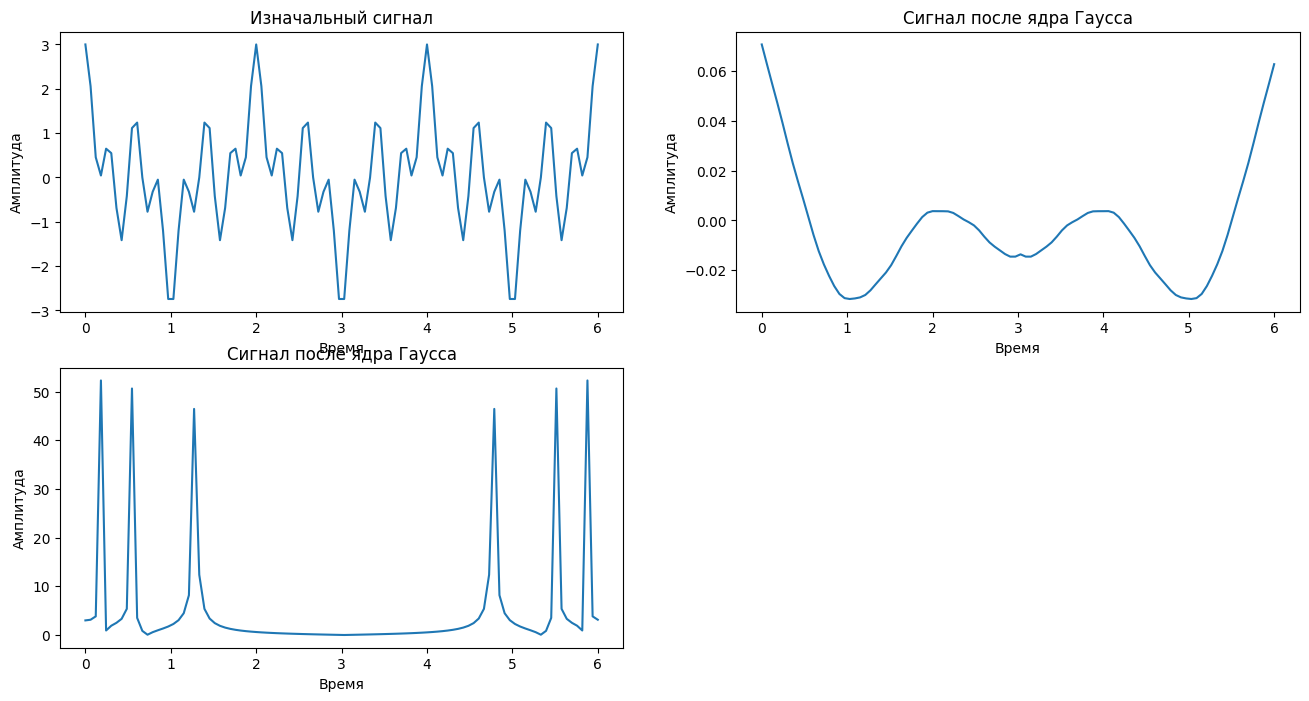

In [8]:
def gaussian_kernel(sigma, size=100):
    x = np.linspace(-3 * sigma, 3 * sigma, size)
    kernel = (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-(x**2) / (2 * sigma**2))
    return kernel, x

def calculate_cos(w):
  res_w = 2 * np.pi * w 
  cos_func = lambda t: np.cos(res_w * t)
  return cos_func

cos_50f = calculate_cos(50)
cos_150f = calculate_cos(150)
cos_250f = calculate_cos(350)
cos_sum = lambda t: cos_50f(t) + cos_150f(t) + cos_250f(t)

t = np.linspace(0, 6, 100)
signal = np.array([cos_sum(x) for x in t])

gaussian_kernel_vals, t_kernal = gaussian_kernel(10, 100)

gaussed_signal = np.convolve(signal, gaussian_kernel_vals, mode='same')

print_1_2(t, t_kernal, gaussian_kernel_vals, signal, gaussed_signal, "Гаус")

spectrum_cos_sum = np.abs(np.fft.fft(signal))

fig = plt.figure(figsize=(16,8))

plt.subplot(221)
plt.title("Изначальный сигнал")
plt.plot(t, signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(222)
plt.title("Сигнал после ядра Гаусса")
plt.plot(t, gaussed_signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(223)
plt.title("Сигнал после ядра Гаусса")
plt.plot(t, spectrum_cos_sum)
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.show()

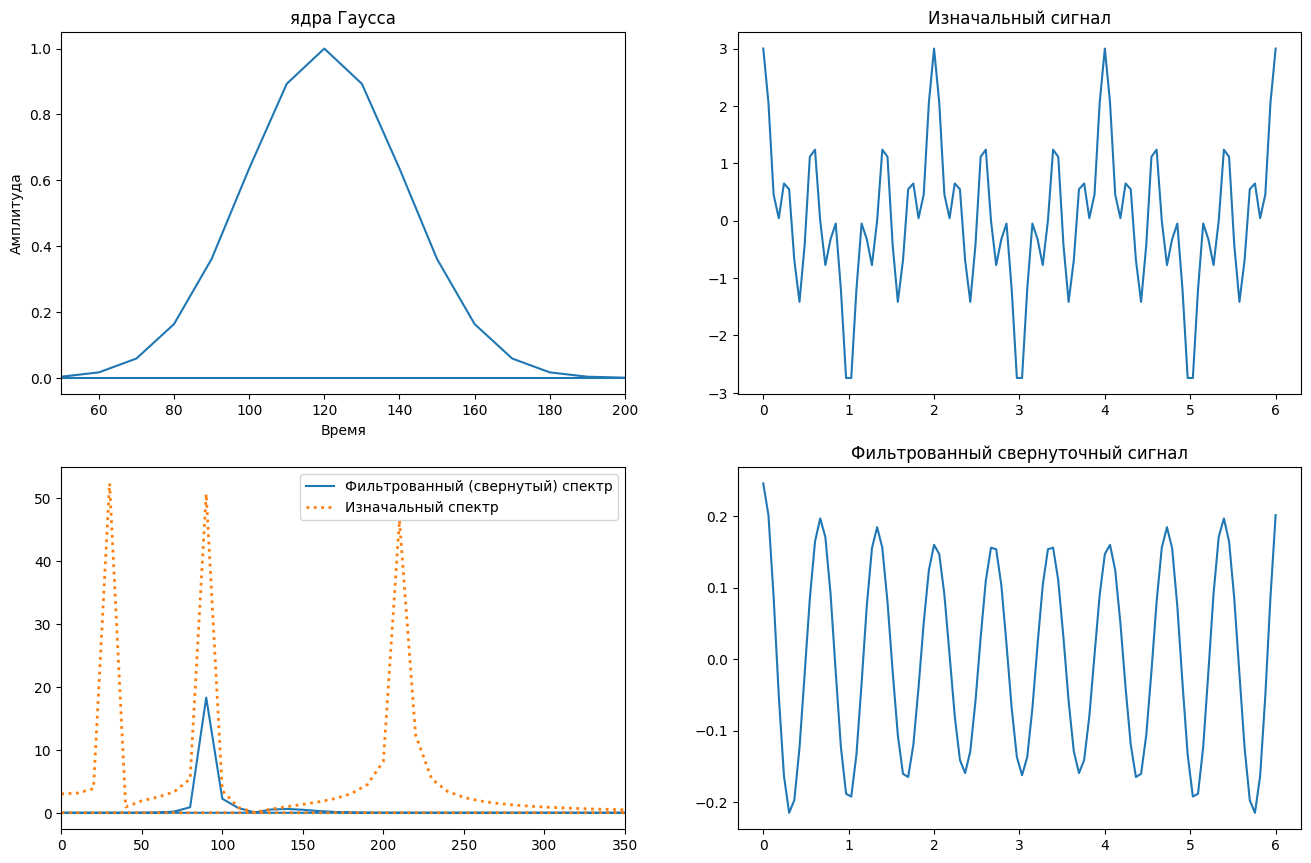

In [147]:
def gaussian_frequency_kernel(frequencies, peak_frequency, FWHM):
    s = (FWHM * (2 * np.pi - 1)) / (4 * np.pi)
    kernel = np.exp(-0.5 * ((frequencies - peak_frequency) / s) ** 2)
    return kernel

sample_rate = 1000
peak_frequency = 120
FWHM = 50

# Создаем частотный массив
frequencies = np.fft.fftfreq(len(t), 1.0 / sample_rate)

frequency_kernel = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

spectrum_cos_sum = np.abs(np.fft.fft(signal))
conved_cos_sum = frequency_kernel * spectrum_cos_sum

plt.figure(figsize=(16, 16))

plt.subplot(321)
plt.plot(frequencies, np.abs(frequency_kernel))
plt.title('ядра Гаусса')
plt.xlim([50, 200])
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(322)
plt.title("Изначальный сигнал")
plt.plot(t, signal)

plt.subplot(323)
plt.plot(frequencies, conved_cos_sum, label='Фильтрованный свернутый спектр')
plt.plot(frequencies, np.abs(np.fft.fft(signal)), label='Изначальный спектр',  linestyle='dotted', linewidth=2)
plt.xlim([0, 350])
plt.legend()

plt.subplot(324)
plt.title("Фильтрованный свернуточный сигнал")
plt.plot(t, np.fft.ifft(conved_cos_sum))

plt.show()

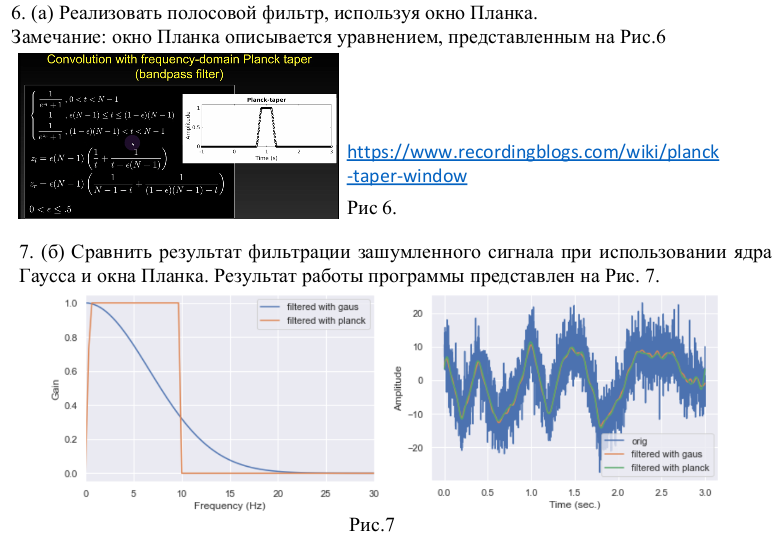

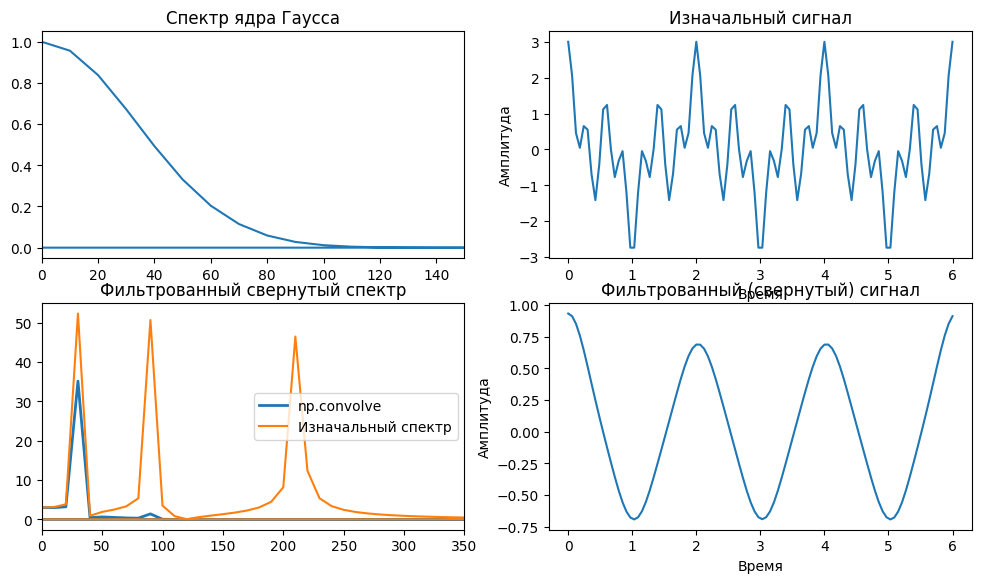

In [154]:
def gaussian_frequency_kernel(frequencies, peak_frequency, FWHM):
    s = (FWHM * (2 * np.pi - 1)) / (4 * np.pi)
    kernel = np.exp(-0.5 * ((frequencies - peak_frequency) / s) ** 2)
    return kernel

sample_rate = 1000
peak_frequency = 0
FWHM = 80

# Создаем частотный массив
frequencies = np.fft.fftfreq(len(t), 1.0 / sample_rate)

frequency_kernel = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

spectrum_cos_sum = np.abs(np.fft.fft(signal))
conved_cos_sum = frequency_kernel * spectrum_cos_sum

fig = plt.figure(figsize=(12,10))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.subplot(321)
plt.plot(frequencies, np.abs(frequency_kernel))
plt.title('Cпектр ядра Гаусса')
plt.xlim([0, 150])

plt.subplot(322)
plt.title("Изначальный сигнал")
plt.plot(t, signal)
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.subplot(323)
plt.title("Фильтрованный свернутый спектр")
plt.plot(frequencies, conved_cos_sum, label='np.convolve', linewidth=2)
plt.plot(frequencies, np.abs(np.fft.fft(signal)), label='Изначальный спектр')
plt.xlim([0, 350])
plt.legend()

plt.subplot(324)
plt.title("Фильтрованный (свернутый) сигнал")
plt.plot(t, np.fft.ifft(conved_cos_sum))
plt.xlabel('Время')
plt.ylabel('Амплитуда')

plt.show()

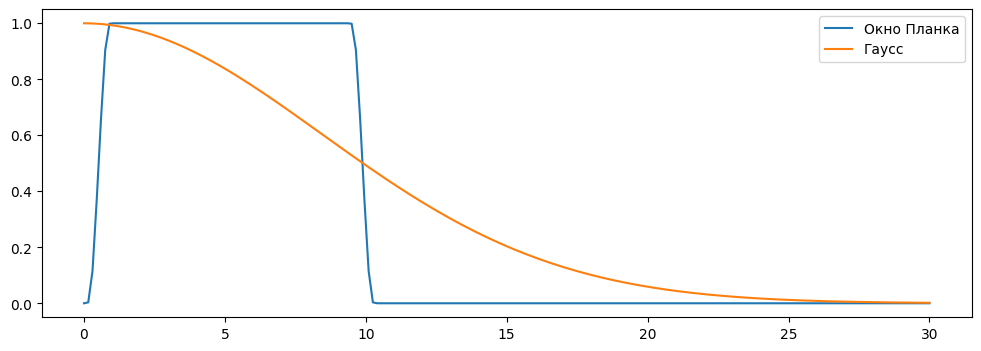

In [164]:
def get_param_function_plank(k, eps, N):
    za = lambda k, eps, N: eps * (N - 1) * (1 / k + 1 / (k - eps * (N - 1)))
    zb = lambda k, eps, N: eps * (N - 1) * (1 / (N - 1 - k) + 1 / (-k + (1 - eps) * (N - 1)))

    if k == 0 or k == N - 1:     return 0
    if k < eps * (N - 1):        return 1 / (np.exp(za(k, eps, N)) + 1)
    if k <= (1 - eps) * (N - 1): return 1
    if k < N - 1:                return 1 / (np.exp(zb(k, eps, N)) + 1)
    return 0

def window_plank(eps, fwhm, m_len=200):
    plank = [get_param_function_plank(k, eps, fwhm) for k in range(fwhm)]
    return np.pad(plank, (0, m_len-len(plank)))

planka = window_plank(0.1,70)
frequencies = np.linspace(0, 30, 200)
peak_frequency = 0
FWHM = 20 
gaus_freqs = gaussian_frequency_kernel(frequencies, peak_frequency, FWHM)

fig = plt.figure(figsize=(12,4))
plt.plot(frequencies, planka, label="Окно Планка")
plt.plot(frequencies, gaus_freqs, label="Гаусс")
plt.legend()
plt.show()

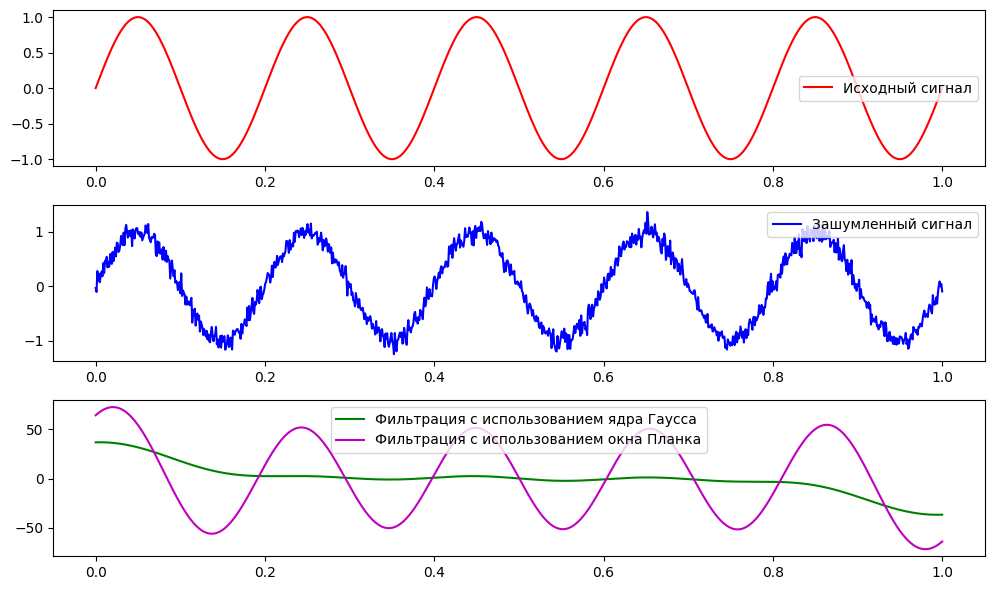

In [161]:
from scipy.signal import convolve

t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 5 * t)  # Сигнал
noise = np.random.normal(0, 0.1, 1000)  # Гауссовский шум
noisy_signal = signal + noise  # Зашумленный сигнал

gaussian_kernel = np.exp(-0.5 * (t - 0.5)**2 / 0.1**2)  # Ядро Гаусса
plank_window = np.sinc(2 * 5 * (t - 0.5))  # Окно Планка

filtered_signal_gaussian = convolve(noisy_signal, gaussian_kernel, mode='same', method='auto')
filtered_signal_plank = convolve(noisy_signal, plank_window, mode='same', method='auto')

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, signal, 'r', label='Исходный сигнал')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, noisy_signal, 'b', label='Зашумленный сигнал')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal_gaussian, 'g', label='Фильтрация с использованием ядра Гаусса')
plt.plot(t, filtered_signal_plank, 'm', label='Фильтрация с использованием окна Планка')
plt.legend()

plt.tight_layout()
plt.show()